<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [61]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [63]:
data = pd.read_csv('./train.csv')

In [64]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Вывод случайных строк

In [65]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2177,9,44.95,431,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
3938,18,88.85,1594.75,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,0
2826,7,44.75,333.65,Male,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,0
2029,56,52.70,3019.7,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2395,3,45.45,141.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
4633,3,35.45,106.85,Male,0,No,No,No,No phone service,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
2248,5,20.55,99.45,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0
4013,71,108.55,7616,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
3752,72,19.30,1414.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2766,24,84.85,2048.8,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


Данные кажутся довольно корректными.

### Проверка пропусков в данных

In [66]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропусков в данныхх нет. Посмотрим на статистику по числовым столбцам.

In [67]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending
count,5282.000000,5282.000000
mean,32.397009,64.924754
std,24.550326,30.176464
min,0.000000,18.250000
25%,9.000000,35.462500
50%,29.000000,70.400000
75%,55.000000,90.050000
max,72.000000,118.750000


Куда делся `TotalSpent`? Посмотрим на ифнормацию о типах данных:

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим, что тип данных был определён ошибочно. Исправим это, и произведём замену пустых строк на Nan.

In [69]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.nan).astype(float)
data['TotalSpent'].isna().sum()

9

Заменим на среднее значение:

In [70]:
data.loc[data['TotalSpent'].isna(), 'TotalSpent'] = data['TotalSpent'].mean()

### Проводим итоговую проверку

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [72]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2291.390461
std,24.550326,30.176464,2267.079956
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.587500
50%,29.000000,70.400000,1413.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

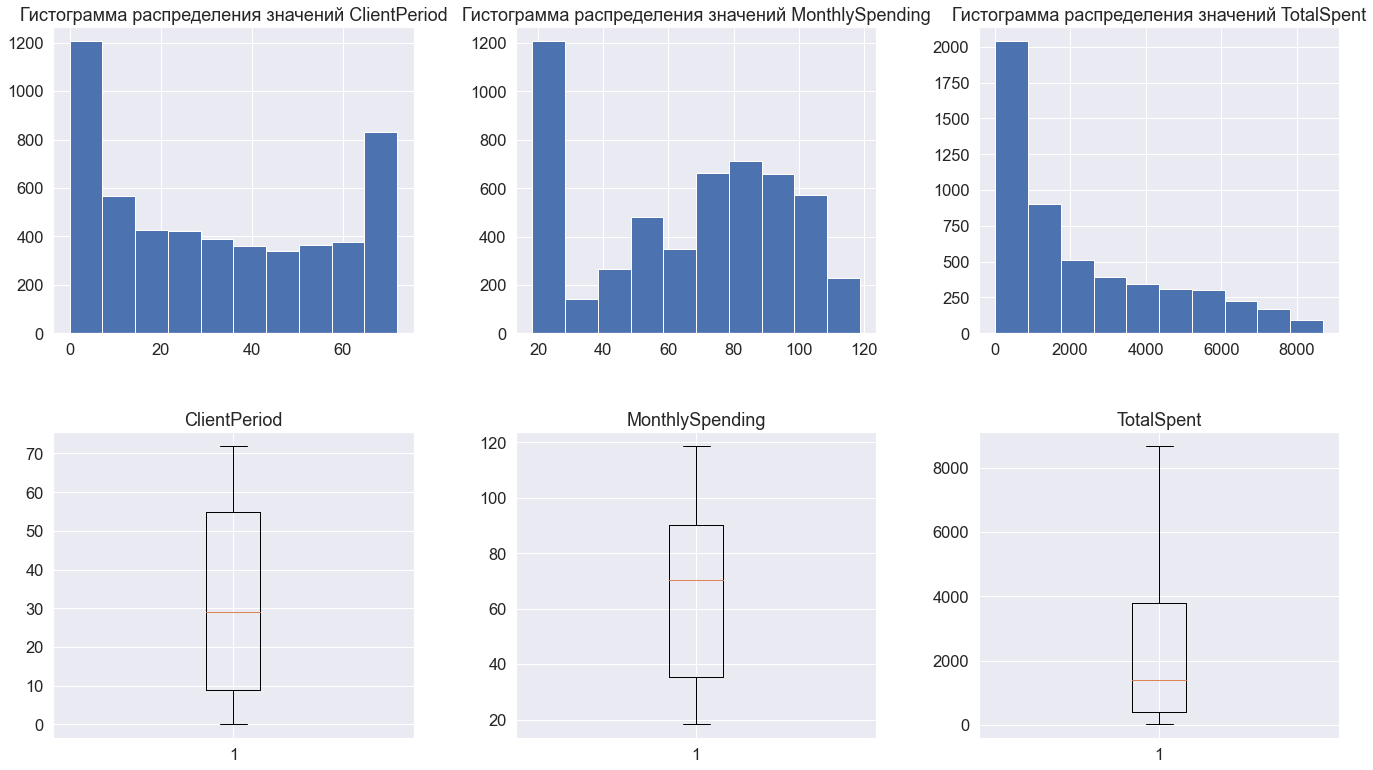

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()
for i, col in enumerate(num_cols):
    axs[i].hist(data[col])
    axs[i].set_title('Гистограмма распределения значений {}'.format(col))
    axs[i+3].boxplot(data[col])
    axs[i+3].set_title(col)
fig.tight_layout(pad=3)

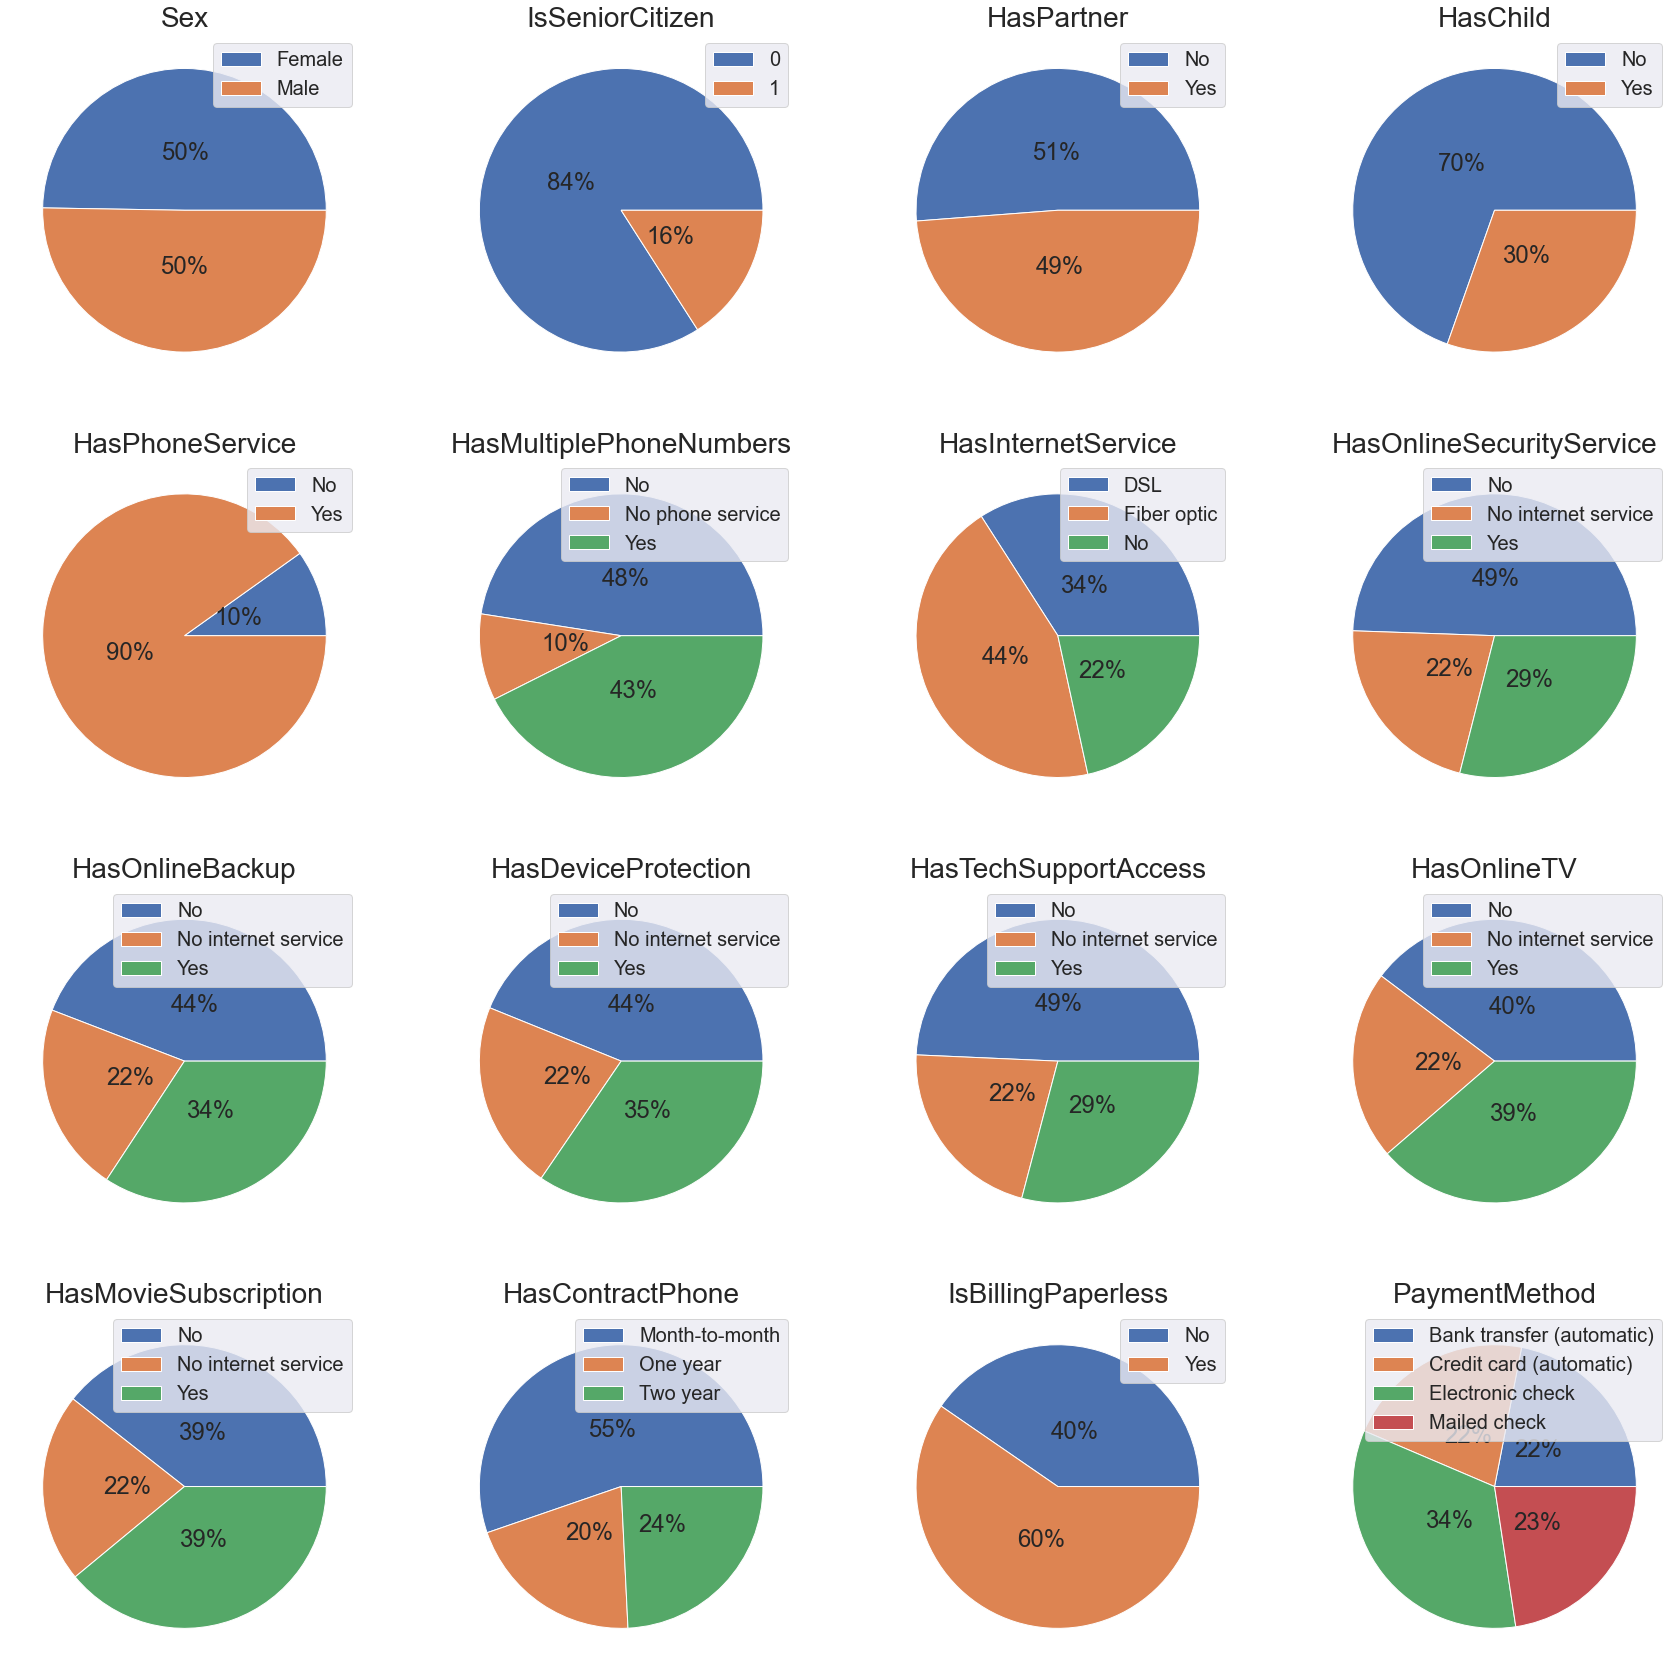

In [52]:
fig, axs = plt.subplots(4, 4, figsize=(30,30))
axs = axs.flatten()
for i, col in enumerate(cat_cols):
    col_values = data.groupby(by=col).size()
    axs[i].pie(x=col_values, autopct='%.0f%%', frame=False, pctdistance=0.4, textprops={'fontsize': 24})
    axs[i].set_title(col).set_fontsize(28)
    axs[i].legend(col_values.index, prop={'size': 20}, loc='upper right')

**По графикам:**

По признаку ClientPeriod клиетов можно разбить на 3 группы. ClientPeriod ниже 10 - люди, которые быстро перестали пользоваться услугами компании. ClientPeriod от 10 до 60 - клиенты со средним периодом активности, их большинство. ClientPeriod выше 60 - наиболее лояльные к компании клиенты.

Распределение признака MontlhlySpending напоминает нормальное с выбросом в диапазоне значений признака 20-30. Этот выброс в распределении формируется из-за большого числа клиентов, которые тратят минимальное количество денег на услуги компании.

Распределение признака TotalSpent напоминает экспоненциальное с положительным параметром и сильным выбросом в районе 0.

**Выводы:** Можно предположить, что чаще всего клиент принимает решение остаться в компании в первые несколько недель пользования услугами и основной отток происходит как раз в первые несколько недель. Клиенты либо уходят сразу, либо остаются на длительный период.

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

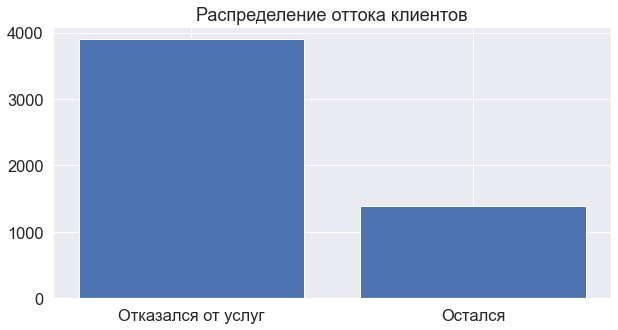

In [57]:
x = ['Клиент остался', 'Клиент ушел']
height = data[target_col].value_counts()
fig = plt.figure(figsize = (10, 5))
plt.bar(x=['Отказался от услуг', 'Остался'], height=height) 
plt.title('Распределение оттока клиентов')
plt.show()

**Вывод:** Классы не сбалансированы. Метрика accuracy не подходит. ROC-AUC будет более подходящей метрикой для оценки модели.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [19]:
def show_jointplot(x, y, df, kind='reg', font_scale=1.5):
    
    sns.set(font_scale=font_scale)

    grid = sns.jointplot(data=data, x=x, y=y, kind=kind)
    
    grid.fig.set_figwidth(10)
    grid.fig.set_figheight(10)

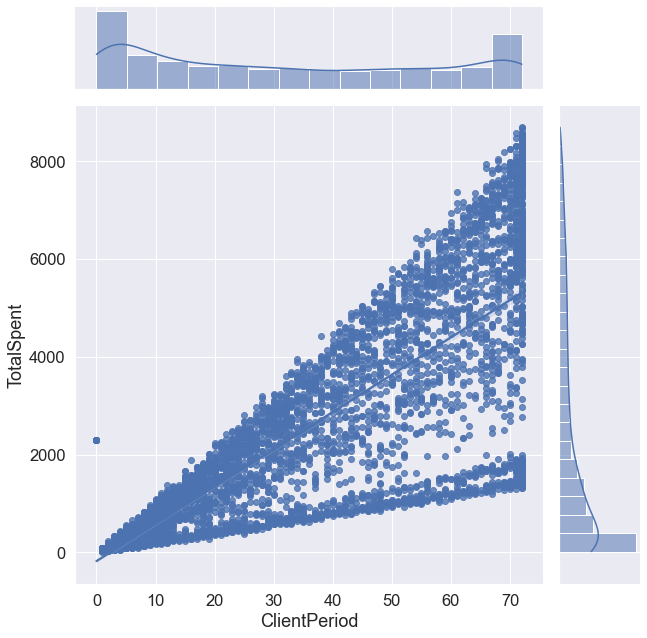

In [20]:
show_jointplot('ClientPeriod', 'TotalSpent', data)

Наблюдаем одну точку, которая является выбросом. Таким образом можно искать выбросы, строя различнве комбинации взаимодейтсвия признаков.

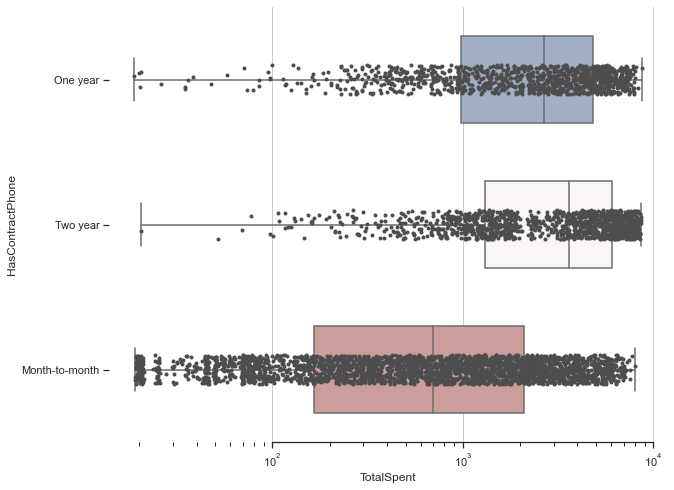

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
sns.set(font_scale=2.5)
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="TotalSpent", y="HasContractPhone", data=data,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="TotalSpent", y="HasContractPhone", data=data,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('scaling', StandardScaler(), num_cols),
    # ('other',  'passthrough', other)
])

In [23]:
reg_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression())
])

In [24]:
reg_pipeline = make_pipeline(column_transformer, LogisticRegression())

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

In [25]:
X_train = data.drop(target_col, axis=1)
y_train = data[target_col]

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [26]:
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__max_iter': np.linspace(100, 500, 5)
}

gs = GridSearchCV(estimator=reg_pipeline, param_grid=param_grid, scoring='roc_auc', refit=True, n_jobs=-1)
gs.fit(X_train, y_train)

D:\Programs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Programs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programs\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
      

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [27]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8449878592529749
{'logisticregression__C': 100, 'logisticregression__max_iter': 100.0, 'logisticregression__penalty': 'l2'}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

In [28]:
# !pip install catboost
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score

In [29]:
X = data.drop(target_col, axis=1)
y = data[target_col]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=41)

In [30]:
cat = CatBoostClassifier(cat_features=cat_cols, verbose=False)
cat.fit(X_train, y_train)

In [31]:
probs = cat.predict_proba(X_valid)[:,-1]
roc_auc_score(y_valid, probs)

0.8554454115285948

**Вывод:** Получаем более хорошее качество, нежили логистическая регрессия с подбором парметров.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [33]:
param_grid = {
    'num_trees': np.linspace(100, 500, 5),
    'learning_rate': np.linspace(0.01, 0.03, 3)
}

catboost = CatBoostClassifier(
    cat_features=cat_cols,
    eval_metric="AUC",
    metric_period=1000,
    task_type="GPU", # закомментировать, если не на GPU
    devices='0',
    random_seed=0,
    verbose = False,
#     use_best_model=True
)

Можно было бы указать больше параметров, но потребуется куда больше времени на обучение.

In [34]:
gr = GridSearchCV(
   estimator=catboost,
   param_grid=param_grid,
   scoring='roc_auc'
)

gr.fit(X, y);

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [35]:
print(gr.best_score_, gr.best_params_, sep='\n')

0.8461018086701342
{'learning_rate': 0.03, 'num_trees': 200.0}


# Предсказания

In [41]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = gr.best_estimator_.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission.head()

,Id,Churn
0,0,0.045191
1,1,0.699883
2,2,0.636956
3,3,0.017494
4,4,0.005836


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

**TEAM:** Aleksey Kuritsyn

**Score:** 0.85307